##**Credit Card Fraud Detection**

Dataset Link:- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


About the project:- The project aims to tackle the Credit Card Fraud Detection Problem, which involves modeling historical credit card transactions, including those that were fraudulent. The objective is to develop a system capable of determining whether a new transaction is fraudulent. The primary goal is to detect all instances of fraudulent transactions while minimizing false positives, thereby ensuring accurate identification of fraudulent activity without inconveniencing legitimate cardholders. The project involves implementing machine learning or statistical models that can effectively classify transactions as fraudulent or non-fraudulent based on various features and patterns extracted from the transaction data.

Columns in the dataset: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Shape of the dataset: (2980, 31)
Description of the dataset:                Time           V1           V2           V3           V4  \
count   2980.000000  2980.000000  2980.000000  2980.000000  2980.000000   
mean   21258.281544    -0.217979     0.131885     0.716511     0.218898   
std    12129.001079     1.858669     1.626783     1.634375     1.409270   
min        1.000000   -27.848181   -38.694338   -28.923756    -5.172595   
25%     9390.250000    -0.974654    -0.440442     0.271536    -0.676650   
50%    25970.000000    -0.273223     0.165383     0.848900     0.165464   
75%    32167.250000     1.171612     0.811863     1.475061     1.091966   
max    35633.000000     1.576009    15.598193     

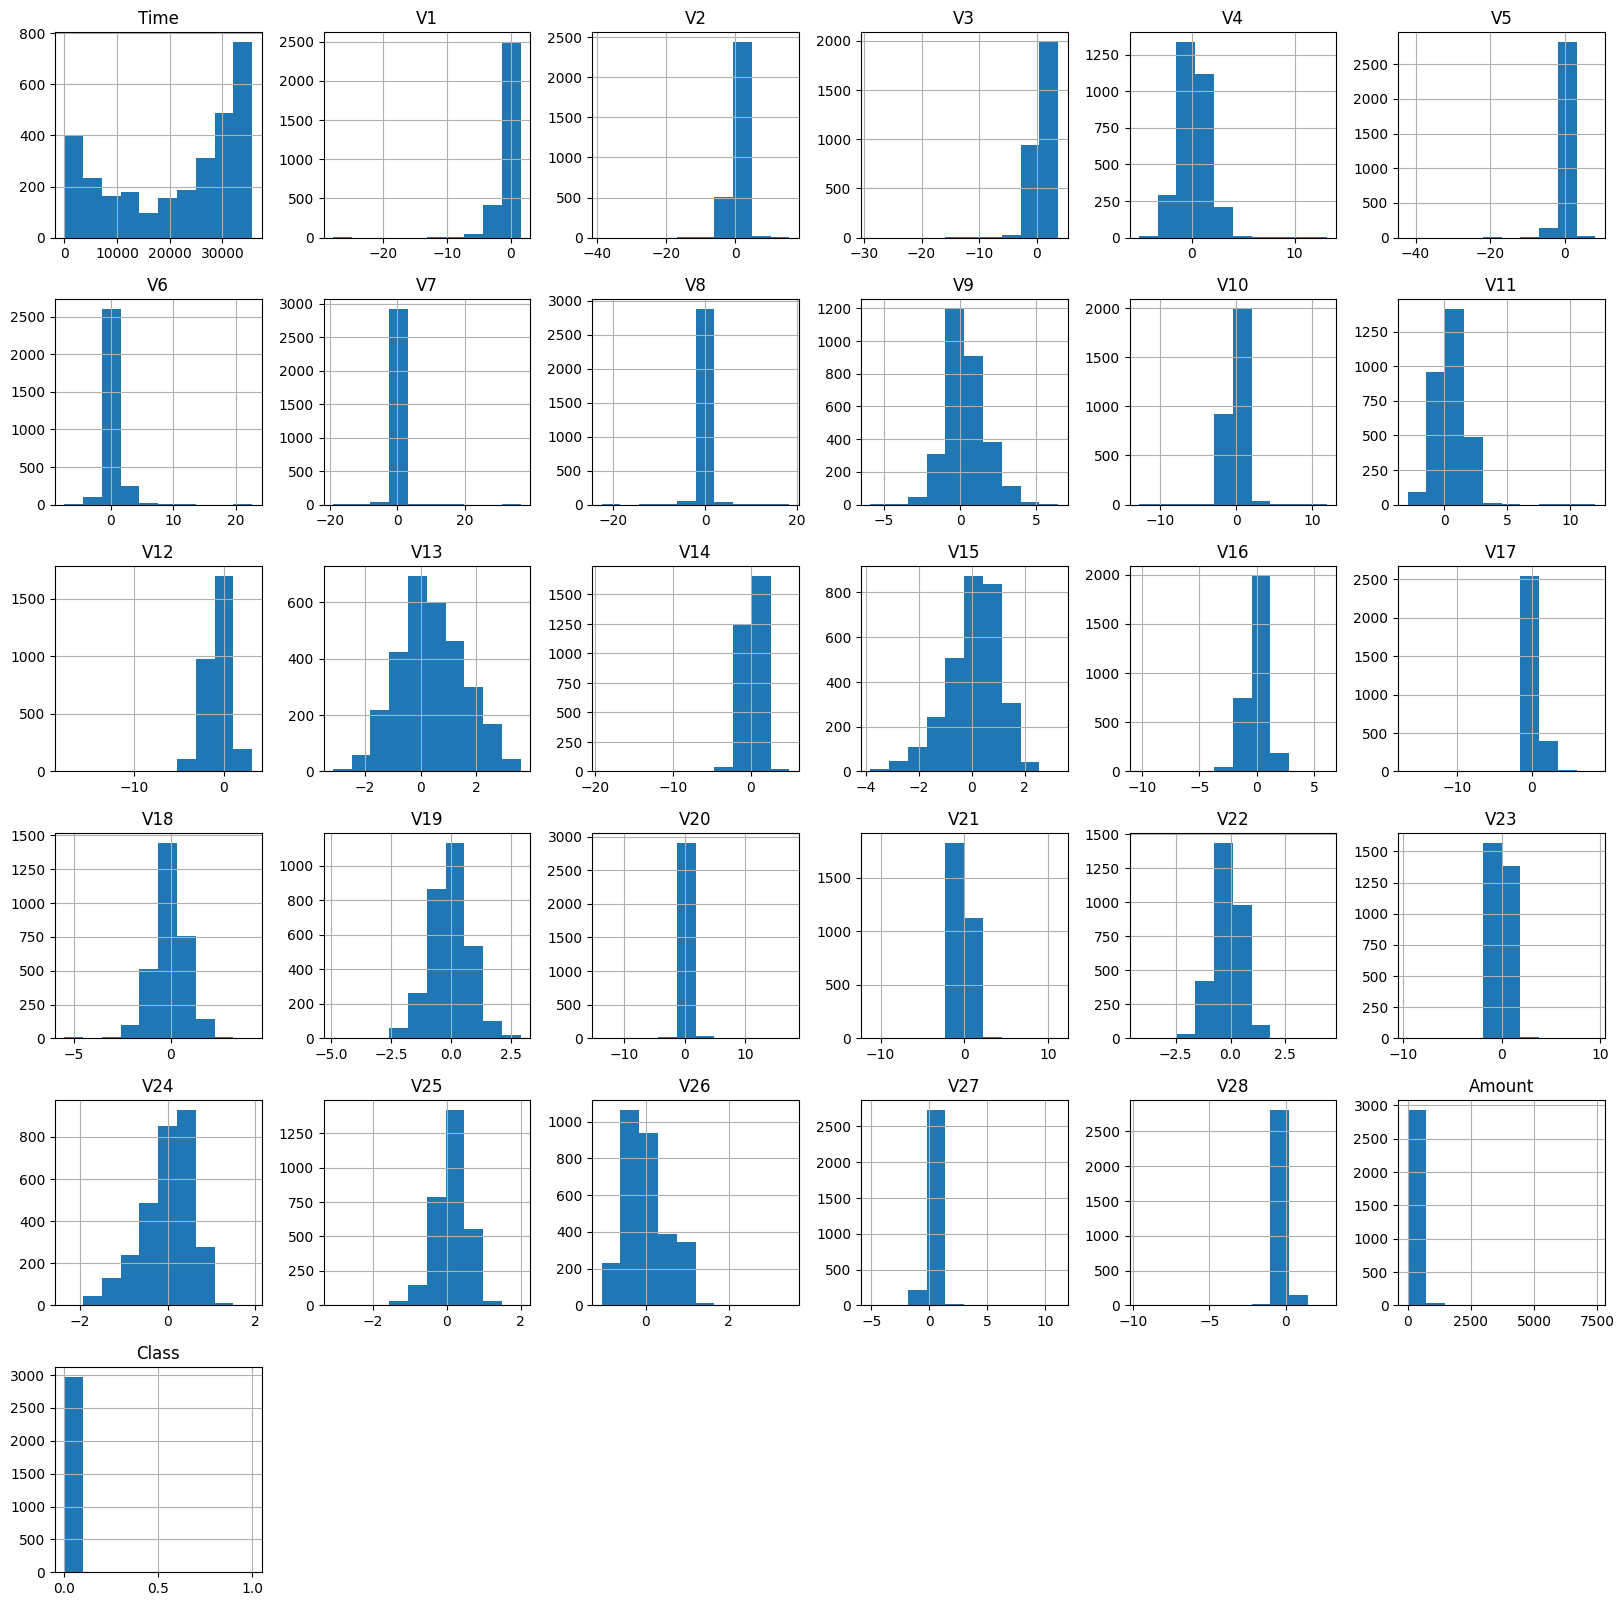

Outlier fraction: 0.0020174848688634837
Fraud Cases: 6
Valid Transactions: 2974


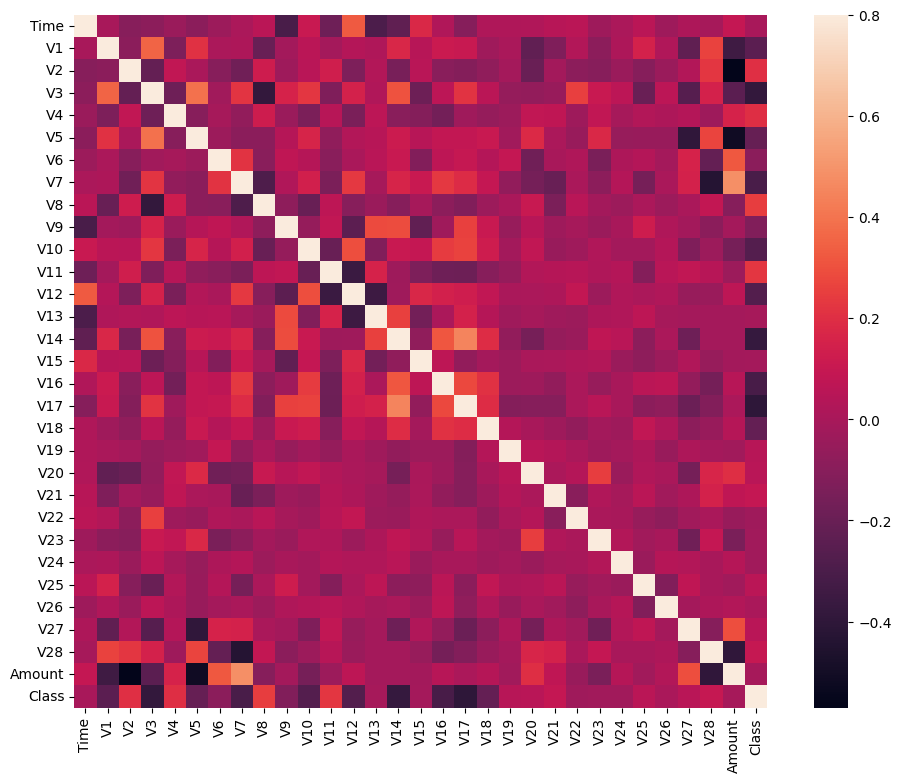

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest : 5
Accuracy Score: 0.9983221476510067
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2974
         1.0       0.57      0.67      0.62         6

    accuracy                           1.00      2980
   macro avg       0.79      0.83      0.81      2980
weighted avg       1.00      1.00      1.00      2980

Local Outlier Factor : 13
Accuracy Score: 0.9956375838926175
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2974
         1.0       0.00      0.00      0.00         6

    accuracy                           1.00      2980
   macro avg       0.50      0.50      0.50      2980
weighted avg       1.00      1.00      1.00      2980



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
data = pd.read_csv(r'/content/creditcard.csv')

# Sample the dataset
data = data.sample(frac=0.1, random_state=1)

# Explore the dataset
print("Columns in the dataset:", data.columns)
print("Shape of the dataset:", data.shape)
print("Description of the dataset:", data.describe())

# Plot histograms of each parameter
data.hist(figsize=(20, 20))
plt.show()

# Determine the proportion of fraud cases
fraud_cases = len(data[data['Class'] == 1])
valid_transactions = len(data[data['Class'] == 0])
outlier_fraction = fraud_cases / valid_transactions
print("Outlier fraction:", outlier_fraction)
print("Fraud Cases:", fraud_cases)
print("Valid Transactions:", valid_transactions)

# Visualize correlation matrix
corrmat = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

# Define features and target variable
features = data.drop("Class", axis=1)
target = data["Class"]

# Adjust outlier fraction if there are no fraud cases
if fraud_cases == 0:
    outlier_fraction = 0.001  # Set a small fraction to avoid division by zero

# Implement outlier detection models
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(features),
                                        contamination=outlier_fraction,
                                        random_state=1),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                               contamination=outlier_fraction)}

# Evaluate models
for clf_name, clf in classifiers.items():
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(features)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(features)
        scores_pred = clf.decision_function(features)
        y_pred = clf.predict(features)

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != target).sum()

    print(clf_name, ":", n_errors)
    print("Accuracy Score:", accuracy_score(target, y_pred))
    print("Classification Report:")
    print(classification_report(target, y_pred))
